<a href="https://colab.research.google.com/github/Lupoyo/projectNew/blob/main/RSAClaims_Performance_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
claims_data = pd.read_excel('/content/drive/MyDrive/Claims Performance Analyst - Assessment v0.3.xlsx', sheet_name='Claims Data')
policies_data = pd.read_excel('/content/drive/MyDrive/Claims Performance Analyst - Assessment v0.3.xlsx', sheet_name='Policies')

In [ ]:
merged_data = claims_data.merge(policies_data,
                                left_on=['Insurer', 'Incident_Month'],
                                right_on=['Insurer', 'Live_Policy_Date'],
                                how='inner')

In [ ]:
median_cost = merged_data['Cost'].median()
merged_data['High_Cost'] = (merged_data['Cost'] > median_cost).astype(int)


In [ ]:
columns_to_drop = ['Claim_Number', 'Incident_Date', 'Cost', 'Live_Policy_Date']
merged_data = merged_data.drop(columns=columns_to_drop)

In [ ]:
# Encode categorical variables
label_encoders = {}
for col in ['Insurer', 'Main_Cause', 'Sub_Cause']:
    le = LabelEncoder()
    merged_data[col] = le.fit_transform(merged_data[col])
    label_encoders[col] = le

In [ ]:
X = merged_data.drop(columns=['High_Cost'])
y = merged_data['High_Cost']


In [ ]:
merged_data.duplicated()

,0
0,False
1,False
2,True
3,False
4,False
...,...
79534,True
79535,True
79536,True
79537,True


In [ ]:
print("Columns in Claims Data:")
print(claims_data.columns)

Columns in Claims Data:
Index(['Claim_Number', 'Incident_Month', 'Incident_Date', 'Insurer',
       'Main_Cause', 'Sub_Cause', 'Cost'],
      dtype='object')


In [ ]:
if 'Claim_Number' in claims_data.columns:
    # Remove duplicates based on the 'Claim_Number' column
    claims_data_cleaned = claims_data.drop_duplicates(subset=['Claim_Number'])
    print("Original Rows in Claims Data:", len(claims_data))
    print("Rows After Removing Duplicates:", len(claims_data_cleaned))
else:
    print("Error: Column 'Claim_Number' not found in Claims Data. Check the column name.")

Original Rows in Claims Data: 79539
Rows After Removing Duplicates: 79539


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

In [ ]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score

In [ ]:
print("Logistic Regression Metrics")
print(classification_report(y_test, y_pred_logistic))
print(f"ROC AUC: {roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])}")

print("\nGradient Boosting Metrics")
print(classification_report(y_test, y_pred_gb))
print(f"ROC AUC: {roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])}")


Logistic Regression Metrics
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      7903
           1       0.70      0.72      0.71      8005

    accuracy                           0.71     15908
   macro avg       0.71      0.71      0.71     15908
weighted avg       0.71      0.71      0.71     15908

ROC AUC: 0.6941827924041211

Gradient Boosting Metrics
              precision    recall  f1-score   support

           0       0.72      0.75      0.74      7903
           1       0.75      0.71      0.73      8005

    accuracy                           0.73     15908
   macro avg       0.74      0.73      0.73     15908
weighted avg       0.74      0.73      0.73     15908

ROC AUC: 0.7869504721639322


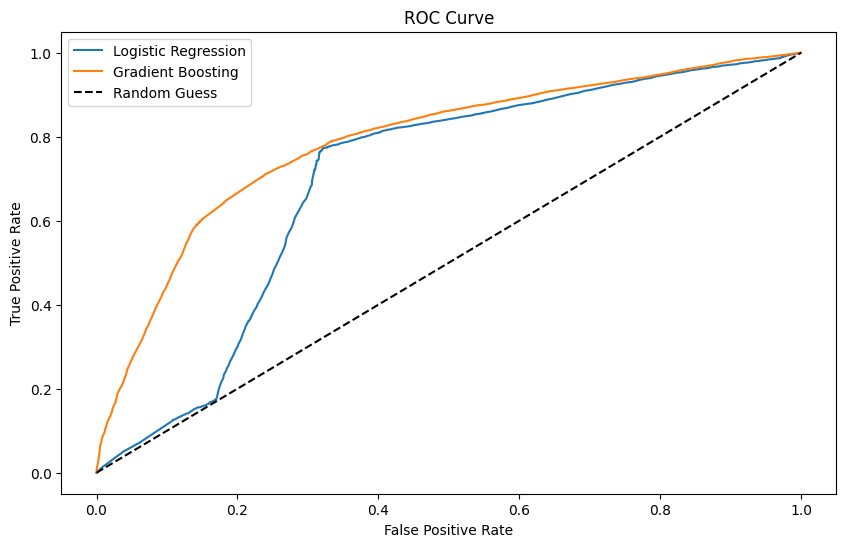

In [ ]:
def plot_roc_curve(model, X_test, y_test, label):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=label)

plt.figure(figsize=(10, 6))
plot_roc_curve(logistic_model, X_test, y_test, "Logistic Regression")
plot_roc_curve(gb_model, X_test, y_test, "Gradient Boosting")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

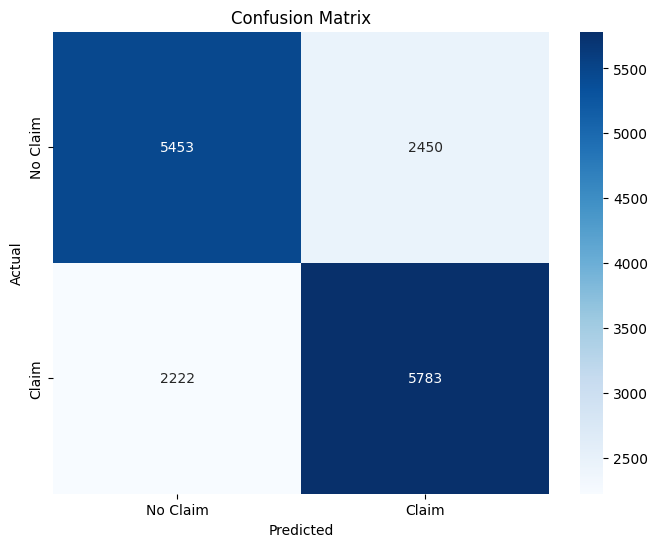

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_logistic )
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Claim', 'Claim'], yticklabels=['No Claim', 'Claim'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

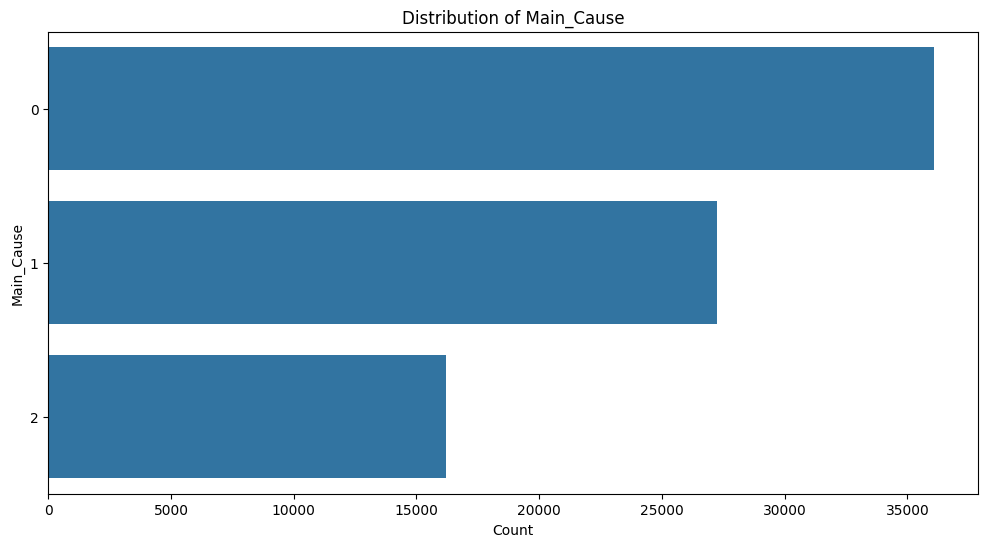

In [ ]:


# Check if 'Main' exists in the merged dataset
if 'Main_Cause' in merged_data.columns:
    # Countplot for Main_cause distribution
    plt.figure(figsize=(12, 6))
    sns.countplot(data=merged_data, y='Main_Cause', order=merged_data['Main_Cause'].value_counts().index)
    plt.title('Distribution of Main_Cause')
    plt.xlabel('Count')
    plt.ylabel('Main_Cause')
    plt.show()





In [ ]:
from sklearn.metrics import precision_recall_curve


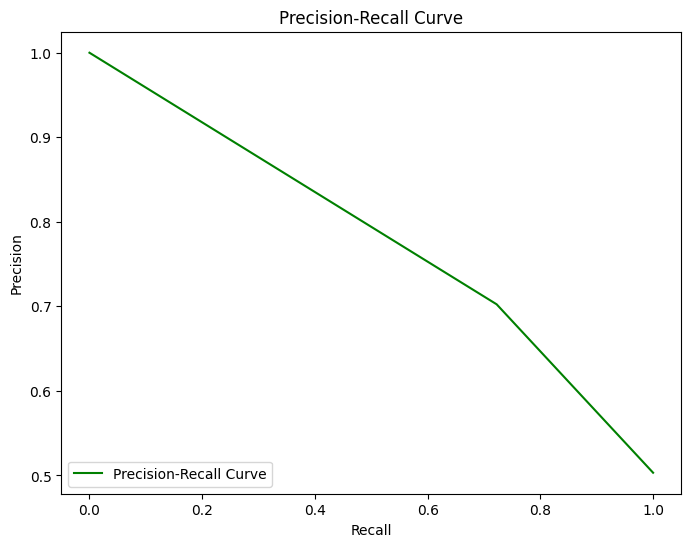

In [ ]:
precision, recall, thresholds_pr = precision_recall_curve(y_test,  y_pred_logistic)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', label='Precision-Recall Curve')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

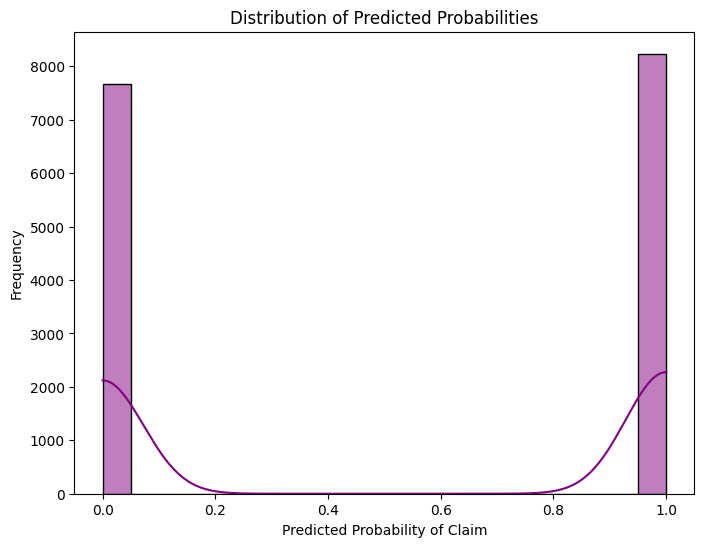

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_logistic, kde=True, bins=20, color='purple')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability of Claim')
plt.ylabel('Frequency')
plt.show()

<ipython-input-36-1b230aea2909>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coefficients, x='Coefficient', y='Feature', palette='coolwarm')


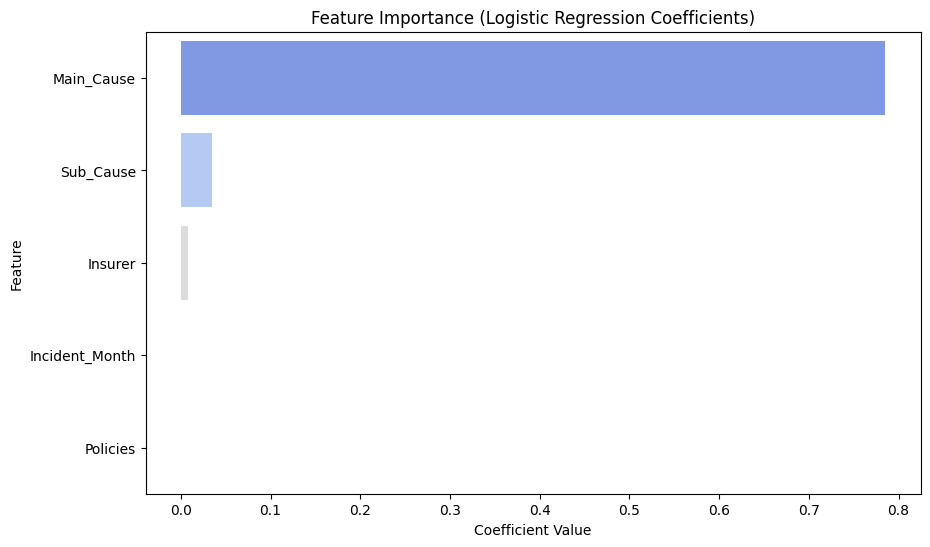

In [ ]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logistic_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=coefficients, x='Coefficient', y='Feature', palette='coolwarm')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()